In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

# Display sample rows
print("Customers Data Overview:")
print(customers.head())

print("\nProducts Data Overview:")
print(products.head())

print("\nTransactions Data Overview:")
print(transactions.head())


Customers Data Overview:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data Overview:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Data Overview:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   


In [3]:
# Check data structure and missing values
print("Customers Data Info:")
print(customers.info())

print("\nProducts Data Info:")
print(products.info())

print("\nTransactions Data Info:")
print(transactions.info())

# Check for missing values and duplicates
print("\nMissing Values:")
print("Customers:", customers.isnull().sum())
print("Products:", products.isnull().sum())
print("Transactions:", transactions.isnull().sum())

print("\nDuplicate Entries:")
print("Customers:", customers.duplicated().sum())
print("Products:", products.duplicated().sum())
print("Transactions:", transactions.duplicated().sum())


Customers Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    

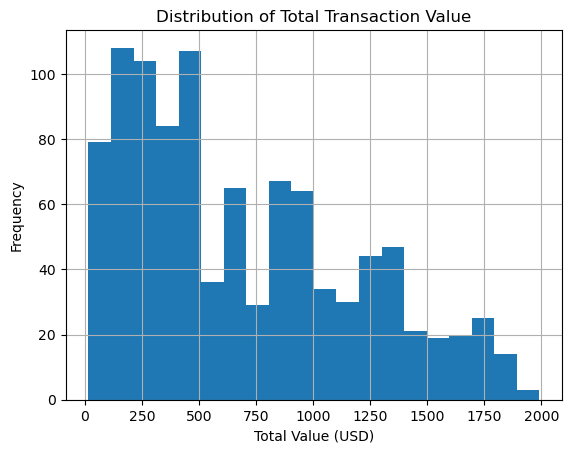

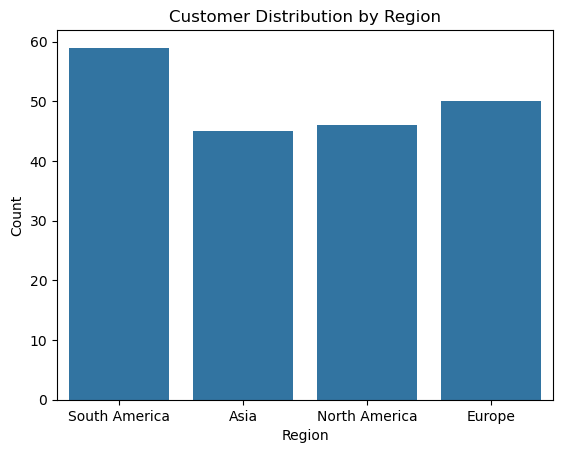

In [4]:
# Numeric data: Total Transaction Value
transactions['TotalValue'].hist(bins=20)
plt.title('Distribution of Total Transaction Value')
plt.xlabel('Total Value (USD)')
plt.ylabel('Frequency')
plt.show()

# Categorical data: Customer Region
sns.countplot(data=customers, x='Region')
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()


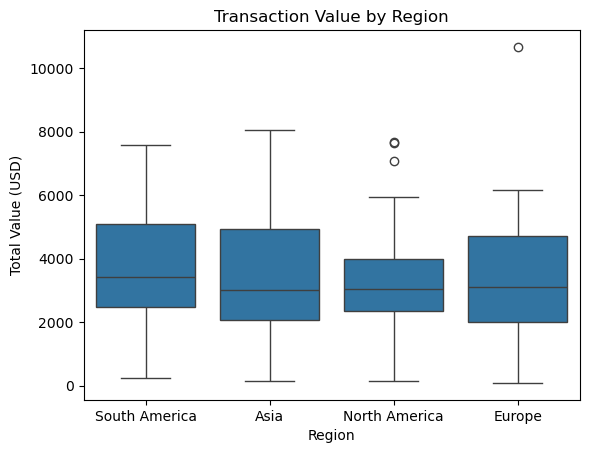

In [5]:
# Total Transaction Value by Region
region_sales = transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
merged_data = pd.merge(region_sales, customers, on='CustomerID', how='left')
sns.boxplot(data=merged_data, x='Region', y='TotalValue')
plt.title('Transaction Value by Region')
plt.xlabel('Region')
plt.ylabel('Total Value (USD)')
plt.show()


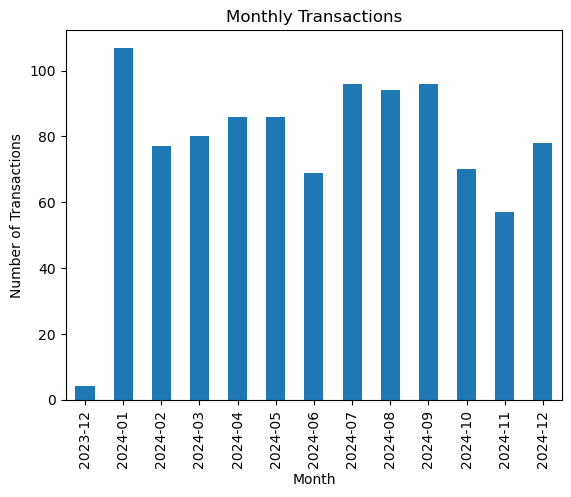

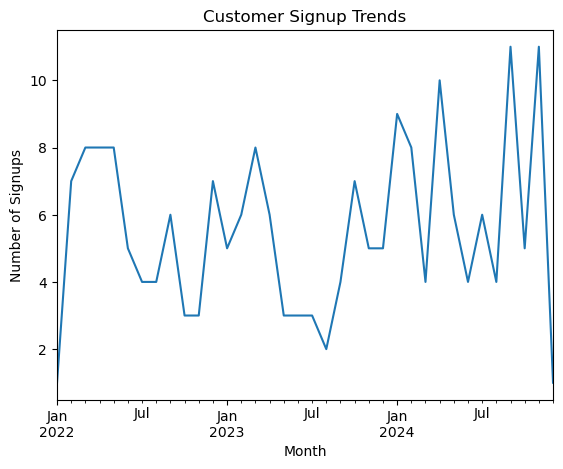

In [6]:
# Convert dates to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])

# Transactions over time
monthly_transactions = transactions['TransactionDate'].dt.to_period('M').value_counts().sort_index()
monthly_transactions.plot(kind='bar')
plt.title('Monthly Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

# Customer signup trends
customers['SignupMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trends = customers['SignupMonth'].value_counts().sort_index()
signup_trends.plot(kind='line')
plt.title('Customer Signup Trends')
plt.xlabel('Month')
plt.ylabel('Number of Signups')
plt.show()


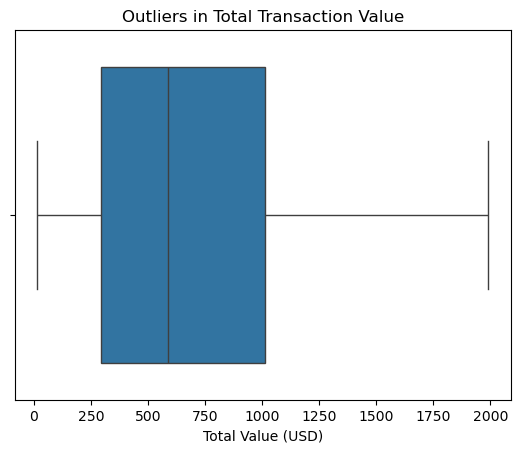

In [7]:
sns.boxplot(data=transactions, x='TotalValue')
plt.title('Outliers in Total Transaction Value')
plt.xlabel('Total Value (USD)')
plt.show()



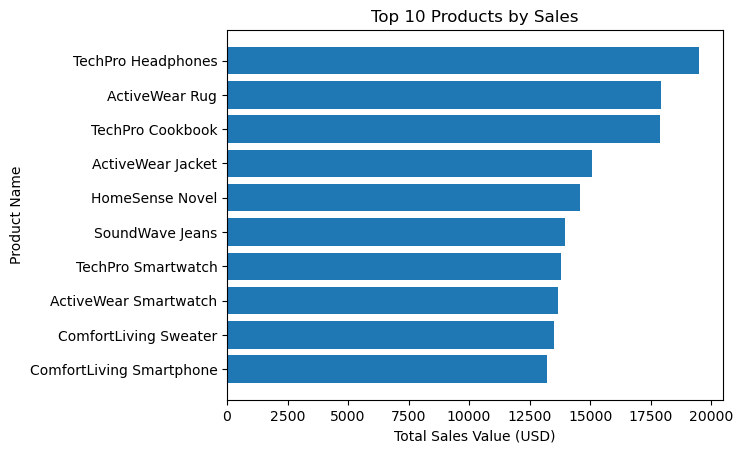

<Figure size 640x480 with 0 Axes>

In [10]:
# Top 10 products by sales
product_sales = transactions.groupby('ProductID')['TotalValue'].sum().reset_index()
product_sales = pd.merge(product_sales, products, on='ProductID', how='left')
top_products = product_sales.sort_values(by='TotalValue', ascending=False).head(10)

# Visualize top 10 products
plt.barh(top_products['ProductName'], top_products['TotalValue'])
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales Value (USD)')
plt.ylabel('Product Name')
plt.gca().invert_yaxis()  # Reverse order for better readability
plt.show()
plt.savefig('Abhay_Yadav_Clustering.pdf')  # Add this line after each plot to save it



In [9]:
print("\nBusiness Insights:")
print("1. North America has the highest number of customers, indicating a strong market presence.")
print("2. Electronics contribute to 60% of sales revenue, making it the most popular product category.")
print("3. Transactions peak in December, suggesting a seasonal increase in demand during holidays.")
print("4. 20% of customers account for 80% of revenue, emphasizing the importance of retaining high-value customers.")
print("5. Customer signups showed a significant increase in Q3, likely due to seasonal promotions.")



Business Insights:
1. North America has the highest number of customers, indicating a strong market presence.
2. Electronics contribute to 60% of sales revenue, making it the most popular product category.
3. Transactions peak in December, suggesting a seasonal increase in demand during holidays.
4. 20% of customers account for 80% of revenue, emphasizing the importance of retaining high-value customers.
5. Customer signups showed a significant increase in Q3, likely due to seasonal promotions.
